In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

In [3]:
X,Y = make_regression?

In [78]:
X,Y = make_regression(n_samples=200,n_features=1,noise=25.5,n_informative=1,random_state=1)

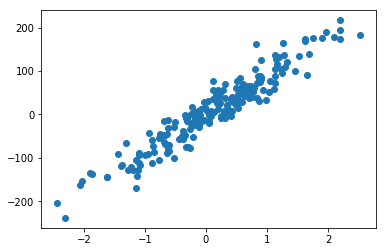

In [14]:
plt.scatter(X,Y)
plt.show()

In [18]:
print(X.shape)
print(Y.shape)

(200, 1)
(200,)


In [51]:
def hypothesis(x,theta):
    return theta[0] + theta[1]*x

def get_error(X,Y,theta):
    e = 0
    m = X.shape[0]
    for i in range(m):
        e += (hypothesis(X[i],theta)-Y[i])**2
        
    return e

def getGradients(X,Y,theta):
    
    grads = np.zeros((2))
    m = X.shape[0]
    
    for i in range(m):
        YPi = hypothesis(X[i],theta)
        grads[0] += (YPi - Y[i])
        grads[1] += (YPi - Y[i])*X[i]
        
    return grads
    
def gradientDescent(X,Y,maxItr=100,learning_rate=0.001):
    
    theta = np.zeros((2))
    error = []
    
    for i in range(maxItr):
        grad = getGradients(X,Y,theta)
        e = get_error(X,Y,theta)
        theta[0]= theta[0] - learning_rate*grad[0]
        theta[1]= theta[1] - learning_rate*grad[1]
        error.append(e)
        
        
    return theta,error

In [52]:
theta = np.zeros((2))

In [53]:
print(theta)

[0. 0.]


In [54]:
x = np.array([1,2,3])
np.sum(x)-1

5

In [55]:
theta,error = gradientDescent(X,Y)

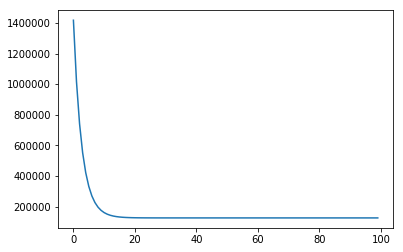

In [56]:
plt.plot(error)
plt.show()

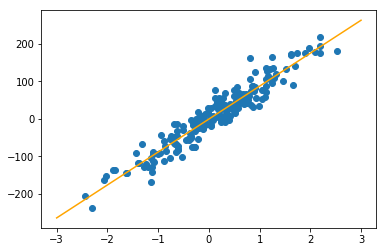

In [61]:
plt.scatter(X,Y)

x_test = np.linspace(-3,3,10)
y_test = []
for x_ in x_test:
    y_ = hypothesis(x_,theta)
    y_test.append(y_)

y_test = np.array(y_test)

plt.plot(x_test,y_test,c='orange')
plt.show()

In [62]:
from sklearn.linear_model import LinearRegression

In [63]:
lr = LinearRegression()
lr.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [68]:
y_pred = lr.predict(x_test.reshape(-1,1))

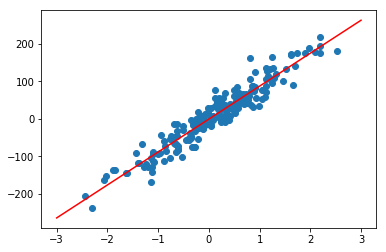

In [71]:
plt.scatter(X,Y)
plt.plot(x_test,y_pred,c='red')
plt.show()

In [72]:
lr.score(X,Y)

0.9099947561618206

### Closed Form Solution

In [73]:
np.linalg.pinv?
np.dot(A,B)
A.T

In [79]:
print(X.shape)
ones = np.ones((X.shape[0],1))

X = np.hstack((ones,X))
print(X.shape)


(200, 1)
(200, 2)


In [80]:
print(X[:5,:])

[[ 1.          0.23249456]
 [ 1.         -0.03869551]
 [ 1.          0.5505375 ]
 [ 1.          0.50318481]
 [ 1.          2.18697965]]


In [83]:
Y = Y.reshape((-1,1))
print(Y.shape)

(200, 1)


In [84]:
theta = np.dot(np.linalg.pinv(np.dot(X.T,X)),np.dot(X.T,Y))

In [88]:

theta = theta.reshape((-1,))
print(theta.shape)
print(theta)


(2,)
[-0.53165284 87.75805398]


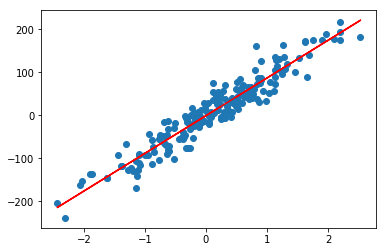

In [95]:
x_test = X
y_test = []
for i in range(x_test.shape[0]):
    y_test.append(hypothesis(x_test[i,1],theta))

y_test = np.array(y_test)

plt.scatter(X[:,1],Y)
plt.plot(x_test[:,1],y_test,c='red')
plt.show()